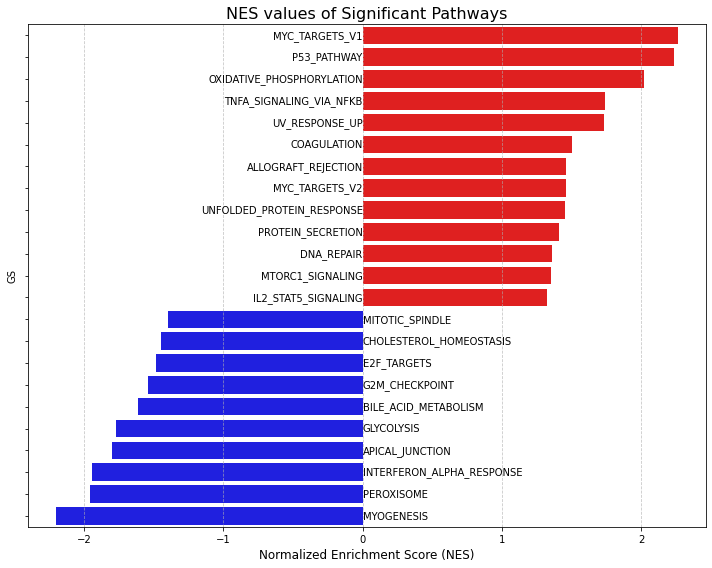

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data
data = pd.read_csv("input-files/gsea-hallmark-results.csv")

# Filter data based on significance: FDR < 25% and p-value < 5%
significant_data = data[(data['FDR q-val'] < 0.25) & (data['NOM p-val'] < 0.05)]

# Sort data based on NES values
significant_data = significant_data.sort_values(by='NES', ascending=False)

# Remove "HALLMARK_" from the pathway names
significant_data['GS'] = significant_data['GS'].str.replace('HALLMARK_', '', regex=False)

# Create a color column: blue for positive NES, red for negative NES
significant_data['Color'] = significant_data['NES'].apply(lambda x: 'blue' if x > 0 else 'red')

# Set up the figure and axis
plt.figure(figsize=(10, 8))

# Create a barplot, using NES as the x-axis and GS (pathways) as the y-axis
ax = sns.barplot(x='NES', y='GS', data=significant_data, palette=['red', 'blue'], hue='Color', dodge=False)

# Title and labels
plt.title('NES values of Significant Pathways', fontsize=16)
plt.xlabel('Normalized Enrichment Score (NES)', fontsize=12)

# Set x-axis limits and grid
plt.xlim(min(significant_data['NES']) - 0.2, max(significant_data['NES']) + 0.2)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Remove the regular y-axis labels (since they are now displayed inside the bars)
ax.set_yticklabels([])

# Remove the color legend
plt.legend().set_visible(False)

# Add labels inside the bars based on NES value
for index, row in significant_data.iterrows():
    if row['NES'] > 0:
        # For positive NES values, place labels on the left side of the bars at NES = 0
        ax.text(0, index, row['GS'], ha='right', va='center', fontsize=10, color='black')
    else:
        # For negative NES values, place labels on the right side of the bars at NES = 0
        ax.text(0, index-9, row['GS'], ha='left', va='center', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()


